# Ящики

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import scikit_posthocs as sp

## 1. Маленький игрушечный спектр

### Загрузка и предобработка

In [23]:
mse_ga = pd.read_csv('../data/results/mse/small/mse_ga_small.csv')
mse_sgd = pd.read_csv('../data/results/mse/small/sgd_small.txt', header=None)
mse_fish = pd.read_csv('../data/results/mse/small/results_small.csv')

In [6]:
mse_ga.head(1)

,Unnamed: 0,0
0,0,-0.690257


In [10]:
mse_sgd.head(1)

,0
0,0.741213


In [12]:
mse_fish.head(1)

,Unnamed: 0,best_mse,best_positions,time
0,0,0.525994,"[2.1885135373992934, 1.2321640480232954, 4.245...",151


In [24]:
mse_fish = mse_fish['best_mse']
mse_ga = mse_ga['0']

In [25]:
mse_fish = mse_fish.to_numpy()
mse_ga = -(mse_ga.to_numpy())
mse_sgd = mse_sgd.to_numpy()

### Boxplot

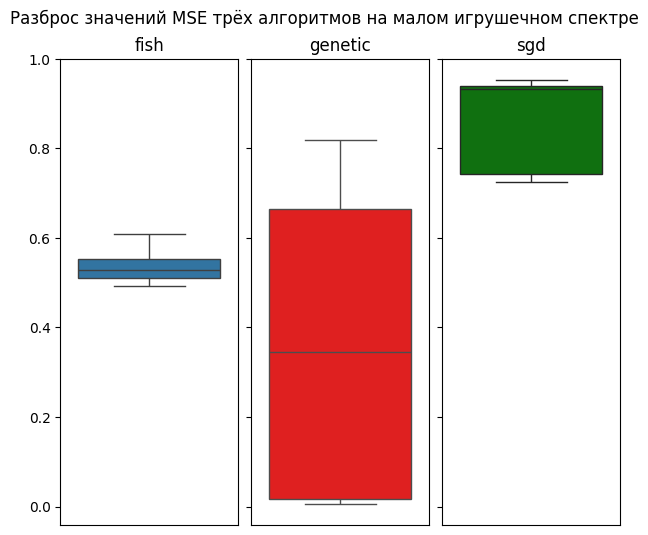

In [40]:
fig, axes = plt.subplots(2, 3, figsize=(6,10),
                       constrained_layout = True, sharey=True)

sns.boxplot(data=mse_fish, ax=axes[0][0]).set(ylabel=None)
sns.boxplot(data=mse_ga, ax=axes[0][1], color='red').set(ylabel=None)
sns.boxplot(data=mse_sgd, ax=axes[0][2], color='green').set(ylabel=None)

axes[0][0].set_title('fish')
axes[0][1].set_title('genetic')
axes[0][2].set_title('sgd')

fig.suptitle('Разброс значений MSE трёх алгоритмов на малом игрушечном спектре')

for i in axes[1]:
  i.set_visible(False)
for i in axes[0]:
  i.get_xaxis().set_visible(False)

## Тест Фридмана

In [ ]:
mse_sgd = [mse[0] for mse in mse_sgd] # from array([[0.74121259], ...] to array([0.74121259, ...] beacause of "ValueError: all the input array dimensions except for the concatenation axis must match exactly..."


In [37]:
# Conduct the Friedman Test
stats.friedmanchisquare(mse_fish, mse_ga, mse_sgd)

FriedmanchisquareResult(statistic=30.900000000000034, pvalue=1.9505193119838727e-07)

In [38]:
!pip install scikit_posthocs


[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [39]:
from scipy import stats
import scikit_posthocs as sp
import numpy as np

# Conduct the Friedman Test
stats.friedmanchisquare(mse_fish, mse_ga, mse_sgd)

# Combine three groups into one array
data = np.array([mse_fish, mse_ga, mse_sgd])

# Conduct the Nemenyi post-hoc test
sp.posthoc_nemenyi_friedman(data.T)


,0,1,2
0,1.00000,0.60082,0.001
1,0.60082,1.00000,0.001
2,0.00100,0.00100,1.000


- fish vs ga: 0.601	-> статистически дают тот же результат
- fish vs sgd: 0.001	-> статистически отличаются, и можно сравнивать алгоритмы ("лучше"/"хуже")
- ga vs sgd: 0.001	-> отличаются, можно сравнивать

## 2. Средний игрушечный спектр

### Загрузка и предобработка

In [41]:
mse_ga = pd.read_csv('../data/results/mse/medium/mse_ga_medium.csv')
mse_sgd = pd.read_csv('../data/results/mse/medium/sgd_medium.txt', header=None)
mse_fish = pd.read_csv('../data/results/mse/medium/results_medium_new.csv')

In [13]:
mse_ga.head(1)

,Unnamed: 0,0
0,0,-1.6883


In [14]:
mse_fish.head(1)

,Unnamed: 0,best_mse,best_positions,time
0,0,0.010577,"[0.14366097194778413, 0.16807218987244749, 0.4...",35


In [16]:
mse_sgd.head(1)

,0
0,48.832373


In [42]:
mse_fish = mse_fish['best_mse']
mse_ga = mse_ga['0']

In [28]:
data_max_sq = np.square(21.4466)
data_max_sq

459.95665156

In [43]:
mse_fish = mse_fish.to_numpy()
mse_sgd = mse_sgd.to_numpy()/data_max_sq # шакалирую
mse_ga = -(mse_ga.to_numpy())/data_max_sq # шкалирую мои mse к тем, которые у леона в fish

In [44]:
mse_fish

array([0.01057676, 0.00883705, 0.00851774, 0.00958411, 0.00940923,
       0.00906746, 0.00853564, 0.00735034, 0.00942109, 0.00764129,
       0.00450363, 0.00893123, 0.01160298, 0.01195074, 0.00792088,
       0.00651   , 0.00875677, 0.00832893, 0.00869171, 0.00834799])

In [45]:
# да костыль времени нет
mse_fish = [[0.01057676, 0.00883705, 0.00851774, 0.00958411, 0.00940923,
       0.00906746, 0.00853564, 0.00735034, 0.00942109, 0.00764129,
       0.00450363, 0.00893123, 0.01160298, 0.01195074, 0.00792088,
       0.00651   , 0.00875677, 0.00832893, 0.00869171, 0.00834799]]

In [62]:
min(mse_fish), max(mse_fish)

(0.006072763936877434, 0.010421483799568736)

### Boxplot для двух

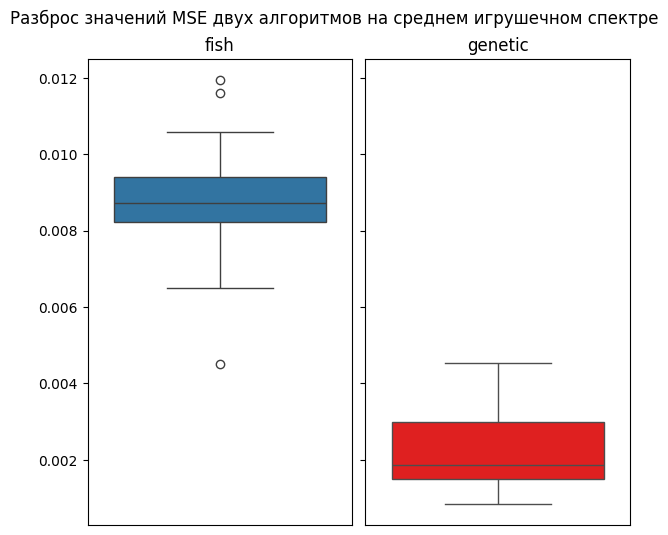

In [33]:
fig, axes = plt.subplots(2, 2, figsize=(6,10),
                       constrained_layout = True, sharey=True)

sns.boxplot(data=mse_fish, ax=axes[0][0]).set(ylabel=None)
sns.boxplot(data=mse_ga, ax=axes[0][1], color='red').set(ylabel=None)

axes[0][0].set_title('fish')
axes[0][1].set_title('genetic')

fig.suptitle('Разброс значений MSE двух алгоритмов на среднем игрушечном спектре')

for i in axes[1]:
  i.set_visible(False)
for i in axes[0]:
  i.get_xaxis().set_visible(False)

### Boxplot для трёх

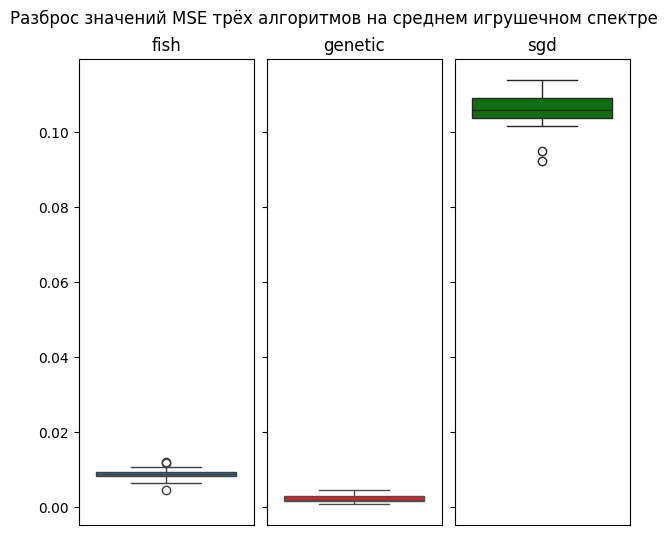

In [53]:
fig, axes = plt.subplots(2, 3, figsize=(6,10),
                       constrained_layout = True, sharey=True)

sns.boxplot(data=mse_fish, ax=axes[0][0]).set(ylabel=None)
sns.boxplot(data=mse_ga, ax=axes[0][1], color='red').set(ylabel=None)
sns.boxplot(data=mse_sgd, ax=axes[0][2], color='green').set(ylabel=None)

axes[0][0].set_title('fish')
axes[0][1].set_title('genetic')
axes[0][2].set_title('sgd')

fig.suptitle('Разброс значений MSE трёх алгоритмов на среднем игрушечном спектре')

for i in axes[1]:
  i.set_visible(False)
for i in axes[0]:
  i.get_xaxis().set_visible(False)

## Фридман + Неменьи

In [48]:
len(mse_fish), len(mse_ga), len(mse_sgd)

(20, 20, 20)

In [46]:
mse_fish = mse_fish[0]
mse_fish = np.array(mse_fish).T
mse_fish

array([0.01057676, 0.00883705, 0.00851774, 0.00958411, 0.00940923,
       0.00906746, 0.00853564, 0.00735034, 0.00942109, 0.00764129,
       0.00450363, 0.00893123, 0.01160298, 0.01195074, 0.00792088,
       0.00651   , 0.00875677, 0.00832893, 0.00869171, 0.00834799])

In [51]:
mse_sgd = [m[0] for m in mse_sgd]
mse_sgd

[0.10616733659480669,
 0.10153610563589241,
 0.10458536091076216,
 0.10783077859243076,
 0.10903089520486586,
 0.10627526572715057,
 0.10360294413122445,
 0.10431023606319341,
 0.09223544975552833,
 0.09495812197266774,
 0.10380504540406993,
 0.1026901160638984,
 0.10873209847410938,
 0.11226520793313371,
 0.10949664633959363,
 0.10508624415039954,
 0.1139312809776163,
 0.11387519238892235,
 0.10549918129998935,
 0.11152313283049123]

In [52]:
# Conduct the Friedman Test
print(stats.friedmanchisquare(mse_fish, mse_ga, mse_sgd))

# Conduct the Friedman Test
stats.friedmanchisquare(mse_fish, mse_ga, mse_sgd)

# Combine three groups into one array
data = np.array([mse_fish, mse_ga, mse_sgd])

# Conduct the Nemenyi post-hoc test
sp.posthoc_nemenyi_friedman(data.T)


FriedmanchisquareResult(statistic=40.0, pvalue=2.0611536224385566e-09)


,0,1,2
0,1.000000,0.004467,0.004467
1,0.004467,1.000000,0.001000
2,0.004467,0.001000,1.000000


- fish vs ga: 0.004467	-> статистически отличаются, и можно сравнивать алгоритмы ("лучше"/"хуже")
- fish vs sgd: 0.004467	-> статистически отличаются
- ga vs sgd: 0.001	-> отличаются, можно сравнивать

### ks_2samp 

In [11]:
stats.ks_2samp(mse_fish[0], mse_ga)

KstestResult(statistic=0.95, pvalue=5.803555641539872e-10, statistic_location=0.004220749612078656, statistic_sign=-1)